<a href="https://colab.research.google.com/github/Gowri4622/MathTeamPro/blob/main/Ex03_minist_classification_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
single_image= X_train[4670]

In [6]:
single_image.shape

(32, 32, 3)

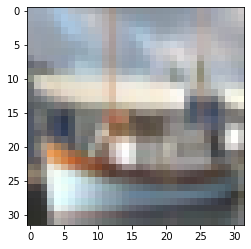

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[25440]

array([2], dtype=uint8)

In [10]:
X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[4673]

array([0], dtype=uint8)

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape

(50000, 10)

In [19]:
y_test_onehot.shape

(10000, 10)

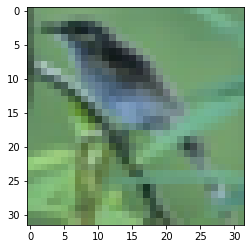

In [35]:
single_image = X_train[800]
plt.imshow(single_image,cmap='gist_rainbow_r')

In [38]:
y_train_onehot[800]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
X_train_scaled = X_train_scaled.reshape(-1,32,32,3)
X_test_scaled = X_test_scaled.reshape(-1,32,32,3)

In [40]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [41]:
model = keras.Sequential()
model.add(layers.Input(shape=(32,32,3)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))



In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [43]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [44]:
model.fit(X_train_scaled ,y_train_onehot, epochs=10,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 1.4096 - accuracy: 0.4980 - val_loss: 1.1674 - val_accuracy: 0.5854
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0534 - accuracy: 0.6309 - val_loss: 0.9880 - val_accuracy: 0.6561
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9157 - accuracy: 0.6804 - val_loss: 0.9702 - val_accuracy: 0.6633
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8219 - accuracy: 0.7108 - val_loss: 0.8785 - val_accuracy: 0.6946
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7413 - accuracy: 0.7425 - val_loss: 0.8553 - val_accuracy: 0.7049
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.6663 - accuracy: 0.7676 - val_loss: 0.8486 - val_accuracy: 0.7149
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5916 - accuracy: 0.7927 - val_loss: 0.8455 - val_accuracy: 0.7197
Epoch 

In [45]:
metrics = pd.DataFrame(model.history.history)

In [46]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.409589,0.49796,1.167435,0.5854
1,1.053364,0.63090,0.988047,0.6561
2,0.915717,0.68042,0.970222,0.6633
3,0.821864,0.71084,0.878506,0.6946
4,0.741276,0.74248,0.855306,0.7049


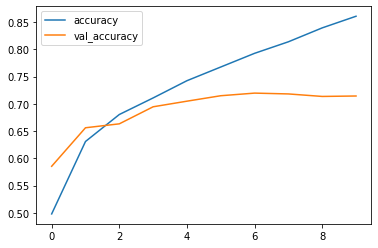

In [47]:
metrics[['accuracy','val_accuracy']].plot()

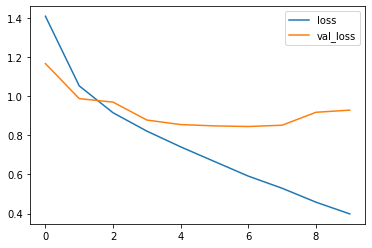

In [48]:
metrics[['loss','val_loss']].plot()

In [49]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [50]:
print(confusion_matrix(y_test,x_test_predictions))

[[769  19  29  19  10   6   9  23  75  41]
 [ 20 798   2   9   1   3   2   9  35 121]
 [ 85   6 571  64  59  56  45  74  20  20]
 [ 27  11  58 521  49 153  45  77  31  28]
 [ 15   3  60  62 600  44  34 150  26   6]
 [ 17   6  52 162  32 590  17  97  14  13]
 [  9  12  50  62  36  35 738  22  14  22]
 [ 14   2  23  23  20  35   2 864   7  10]
 [ 34  32  10  11   4   4   2   7 869  27]
 [ 30  66   4  10   3   3   3  20  37 824]]


In [51]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1000
           1       0.84      0.80      0.82      1000
           2       0.66      0.57      0.61      1000
           3       0.55      0.52      0.54      1000
           4       0.74      0.60      0.66      1000
           5       0.64      0.59      0.61      1000
           6       0.82      0.74      0.78      1000
           7       0.64      0.86      0.74      1000
           8       0.77      0.87      0.82      1000
           9       0.74      0.82      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

